In [1]:
import mytools
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']
import pyreadstat 

In [2]:
数据表 = mytools.读取SPSS数据文件(R'data\demo.sav',True)

In [3]:
数据表.rename(columns={
'@3、您的婚姻状况：':'婚姻状况',
'@9、您的月收入大约是多少？':'月收入',
'@10、2口人，是':'代际',
'@14、您平时一周有几天通过手机上网？':'一周几天上网'

 }, inplace=True)


In [4]:
### 重复值处理
数据表.drop_duplicates(subset=['序号'],keep='first',inplace=True)

In [5]:
### 空白值处理
# 查看变量是否存在空白值
数据表[数据表.isnull().T.any()].head(2)
# 数据表['婚姻状况'].isnull()

,序号,@1、您的性别：,@2、您的年龄：,婚姻状况,@4、您的受教育程度是：,@5、您的政治面貌：,@7、您的信仰是：,@8、您的职业是：,月收入,@10、1您家里有,...,@27、调研地点,@28、问卷编号,@30、问卷录入过程中其他需要说明的问题（若没,年龄段,每周上网时长,生活满意度,生活满意度区间,工作满意度,工作满意度区间,自尊
0,94.0,1.0,58.0,NaN,未上过学,群众,佛教,牧民,NaN,NaN,...,郭卓村,GZ04,(空),5.0,NaN,24.0,基本满意,25.0,基本满意,30.0
1,30.0,1.0,45.0,已婚,未上过学,群众,佛教,牧民,NaN,NaN,...,唐尕村,TG30,无,4.0,NaN,26.0,满意,26.0,满意,30.0


In [6]:
# 对指定变量填充空白值
数据表['婚姻状况'].fillna('已婚', inplace=True)
数据表['月收入'].fillna('三千元以下', inplace=True)
数据表['代际'].fillna(6, inplace=True)

In [7]:
# 对特定值进行替换
数据表['代际'].replace({'(空)':None}, inplace=True)
数据表['代际'].fillna(3, inplace=True)

In [8]:
# 设定变量类型
数据表.astype({'代际':'int'}).head(2)

,序号,@1、您的性别：,@2、您的年龄：,婚姻状况,@4、您的受教育程度是：,@5、您的政治面貌：,@7、您的信仰是：,@8、您的职业是：,月收入,@10、1您家里有,...,@27、调研地点,@28、问卷编号,@30、问卷录入过程中其他需要说明的问题（若没,年龄段,每周上网时长,生活满意度,生活满意度区间,工作满意度,工作满意度区间,自尊
0,94.0,1.0,58.0,已婚,未上过学,群众,佛教,牧民,三千元以下,NaN,...,郭卓村,GZ04,(空),5.0,NaN,24.0,基本满意,25.0,基本满意,30.0
1,30.0,1.0,45.0,已婚,未上过学,群众,佛教,牧民,三千元以下,NaN,...,唐尕村,TG30,无,4.0,NaN,26.0,满意,26.0,满意,30.0


In [9]:
数据表.columns

Index(['序号', '@1、您的性别：', '@2、您的年龄：', '婚姻状况', '@4、您的受教育程度是：', '@5、您的政治面貌：',
       '@7、您的信仰是：', '@8、您的职业是：', '月收入', '@10、1您家里有', '代际', '@10、3代人，家里有',
       '@10、4位老人，家里有', '@10、5个小孩，外出打工的人有___人。', '@11、您平常是否通过电脑上网？',
       '@12、您平常是否通过手机上网？', '@13、您平时一周有几天通过电脑上网？', '一周几天上网',
       '@15、1您每天通过手机上网的时间大概为', '@15、2分钟，您每天通过电脑上网的时间为', '@15、3分钟，您每个月的手机话费为',
       '@15、4元，您家的宽带费为___元。', '@16、互联网使用行为（问卷17题至26题）—17、您',
       '@16、18、您认为您在上网时使用搜索引擎（百度', '@16、19、您经常会通过互联网（辣椒直播、下厨',
       '@16、20、您认为您玩手机网络游戏（斗地主、斗', '@16、21、您经常会通过互联网观看小说么？',
       '@16、22、您经常会通过互联网观看视频（快手、', '@16、23、您认为您通过即时通讯（微信、QQ）与他',
       '@16、24、您经常会通过社交网络（微博、陌陌、', '@16、25、您认为您在互联网（淘宝、拼多多、京',
       '@16、26、您经常使用移动支付（支付宝、微信支', 'Q17_1_我目前的生活接近我理想的状态',
       'Q17_2_我的生活条件在各方面都很不错。', 'Q17_3_对我目前的生活，我很满意。',
       'Q17_4_到目前为止，我已经得到了我想要的东西', 'Q17_5_如果我能再活一次我没有什么要改变',
       '@18、请表述您最近一周的情感状况—6.爱', '@18、7.愉悦', '@18、8.自豪', '@18、9.愤怒',
       '@18、10.忧虑', '@18、11.悲哀', '@19、第三部分—1.我能够获得足够有用的媒介信',
       '@19、2.我能够不断更新自己的信息获取

In [10]:
#第一项：单变量描述统计——月收入
数据表['一周几天上网'].value_counts(normalize=True)

一周几天上网
每周6-7天     0.319149
每周2-5天     0.244681
每周1天及以下    0.202128
从不使用       0.191489
每周4-5天     0.042553
Name: proportion, dtype: float64

In [11]:
数据表['一周几天上网'].value_counts()

一周几天上网
每周6-7天     30
每周2-5天     23
每周1天及以下    19
从不使用       18
每周4-5天      4
Name: count, dtype: int64

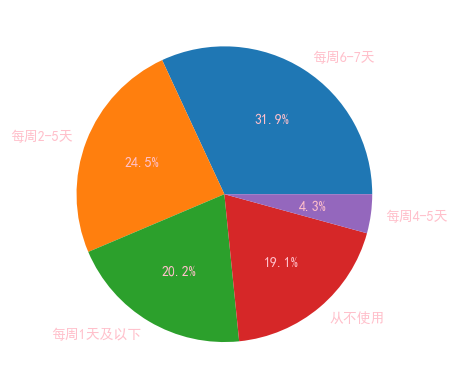

In [12]:
#对有序单变量进行描述，这里我们采用绘制一周几天上网饼图的方式
x = 数据表['一周几天上网'].value_counts().index
y = 数据表['一周几天上网'].value_counts(normalize=True)
fig, ax2 = plt.subplots()
labels = 数据表['一周几天上网'].value_counts().index
ax2.pie(y,autopct='%1.1f%%',labels= labels,textprops=dict(color='pink'))
plt.show()

In [13]:
#进行单变量描述统计——代际
数据表['代际'].value_counts(normalize=True)


代际
3    0.627660
2    0.191489
4    0.085106
3    0.063830
1    0.021277
5    0.010638
Name: proportion, dtype: float64

In [14]:
mytools.制作交叉表(数据表,'一周几天上网','婚姻状况')


婚姻状况,未婚,已婚,All
一周几天上网,,,
从不使用,0.25,0.186047,0.191489
每周1天及以下,0.00,0.220930,0.202128
每周2-5天,0.00,0.267442,0.244681
每周4-5天,0.25,0.023256,0.042553
每周6-7天,0.50,0.302326,0.319149


In [15]:
mytools.两个有序类别变量的统计分析(数据表,'一周几天上网','婚姻状况')


Somers dy系数:-0.0489 极弱相关或无相关
-------------  -  --
从不使用       2  16
每周1天及以下  0  19
每周2-5天      0  23
每周4-5天      2   2
每周6-7天      4  26
-------------  -  --
p值： 0.3162
接受虚无假设


In [16]:
#婚姻状况和一周几天上网区间的相关系数计算
tau_y = mytools.goodmanKruska_tau_y(数据表,'一周几天上网','婚姻状况')
tau_y

0.1468346253229974

In [18]:
#第三项：多变量描述统计
#多变量统计分析，选取多个变量，、B、C影响变量D
#选取 “一周几天上网”、“婚姻状况”两个变量研究其对月收收入在三千元以下人员的影响
cross_tab = pd.crosstab(index=[数据表['一周几天上网']], 
 columns=数据表['婚姻状况'], margins=True, normalize=True) 
cross_tab


婚姻状况,未婚,已婚,All
一周几天上网,,,
从不使用,0.021277,0.170213,0.191489
每周1天及以下,0.000000,0.202128,0.202128
每周2-5天,0.000000,0.244681,0.244681
每周4-5天,0.021277,0.021277,0.042553
每周6-7天,0.042553,0.276596,0.319149
All,0.085106,0.914894,1.000000


In [ ]:
from scipy import stats 
import numpy as np 
import pandas as pd 

# 假设我们关注的是上网在每周6-7天的人  
specific_grade = '每周6-7天' 

# 筛选出特定的区间数据  
df_specific_grade = 数据表[数据表['一周几天上网'] == specific_grade]

# 创建家庭规模、一周几天上网、婚姻状况的的交互表  
cross_tab_specific_grade = pd.crosstab(df_specific_grade['家庭规模'], df_specific_grade['婚姻状况'])

# 进行卡方检验  
chi2_grade, p_grade, dof_grade, expected_grade = stats.chi2_contingency(cross_tab_specific_grade)
chi2_grade, p_grade, dof_grade,

(9.086538461538463, 0.4293246119920718, 9)

In [ ]:
'''
在第一二个研究中，我们分别对单变量“一周几天上网”、“生活满意度”进行了分析并同时对将两个变量之间的关系进行了研究，说明了两变量之间的相关性积弱或无相关
在第三个研究中得到的结果是(9.086538461538463, 0.4293246119920718, 9),
p值是0.1468346253229974,这意味着在给定的显著性水平下，我们没有足够的证据认为观察到的数据与期望的数据有所不同。
所以家庭规模、婚姻状况对月收入三千以下的人这个研究目标是具有可行性的。
'''